In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set(rc={'figure.figsize':[7,7]},font_scale=1.2)

In [6]:
students=pd.read_csv('Students.csv')

In [8]:
students

,Hours,Marks
0,0,34
1,1,36
2,1,33
3,1,39
4,1,42
5,2,45
6,2,38
7,3,45
8,3,53
9,3,46


In [9]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Hours   30 non-null     int64
 1   Marks   30 non-null     int64
dtypes: int64(2)
memory usage: 608.0 bytes


In [11]:
students.describe()

,Hours,Marks
count,30.000000,30.000000
mean,5.200000,61.400000
std,3.188341,17.734828
min,0.000000,33.000000
25%,3.000000,45.250000
50%,5.000000,60.000000
75%,7.750000,77.000000
max,11.000000,89.000000


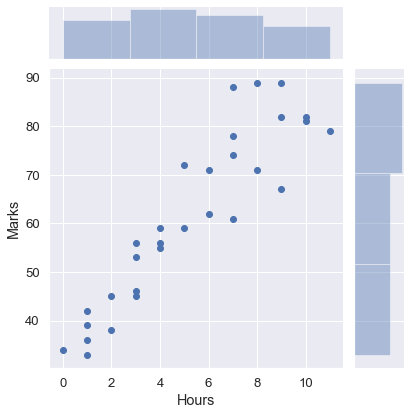

In [12]:
sns.jointplot(x=students['Hours'],y=students['Marks'])

In [113]:
x=students['Hours'].values.reshape(30,1)
y=students['Marks'].values.reshape(30,1)

In [114]:
x,x.shape,y,y.shape

(array([[ 0],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 2],
        [ 2],
        [ 3],
        [ 3],
        [ 3],
        [ 3],
        [ 4],
        [ 4],
        [ 4],
        [ 5],
        [ 5],
        [ 6],
        [ 6],
        [ 7],
        [ 7],
        [ 7],
        [ 7],
        [ 8],
        [ 8],
        [ 9],
        [ 9],
        [ 9],
        [10],
        [10],
        [11]], dtype=int64),
 (30, 1),
 array([[34],
        [36],
        [33],
        [39],
        [42],
        [45],
        [38],
        [45],
        [53],
        [46],
        [56],
        [59],
        [55],
        [56],
        [72],
        [59],
        [62],
        [71],
        [78],
        [88],
        [61],
        [74],
        [71],
        [89],
        [82],
        [67],
        [89],
        [81],
        [82],
        [79]], dtype=int64),
 (30, 1))

In [115]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

##  Train Model

In [116]:
from sklearn.linear_model import LinearRegression

In [117]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Test Model

In [118]:
y_pred = model.predict(x_test)
y_pred

array([[84.85949596],
       [59.91714709],
       [74.88255642],
       [64.90561687],
       [49.94020754],
       [49.94020754]])

In [119]:
y_test

array([[81],
       [59],
       [89],
       [71],
       [53],
       [46]], dtype=int64)

## Calculate R2 Score

In [120]:
model.score(x_train, y_train)

0.8358967942888561

In [121]:
model.score(x_test, y_test)

0.8014559997289386

## Model Parameters

In [122]:
model.coef_

array([[4.98846977]])

In [123]:
model.intercept_

array([34.97479822])

##  Visualize Model

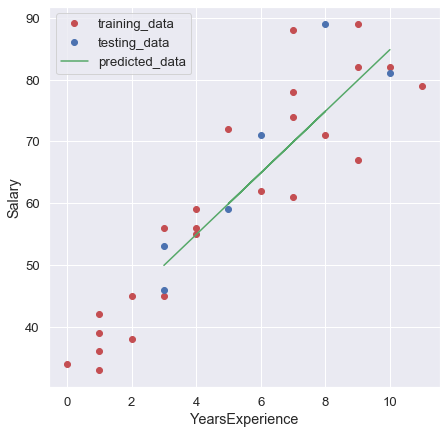

In [124]:
plt.plot(x_train, y_train, 'ro', label='training_data')
plt.plot(x_test, y_test, 'bo', label='testing_data')
plt.plot(x_test, y_pred, 'g-', label='predicted_data')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend()